<a href="https://colab.research.google.com/github/shauryayay/Customer-churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Data and Libraries

Importing essential libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Loading the dataset

In [10]:
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Update with your file path
df = pd.read_csv(file_path)

###Dataset Exploration

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [13]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [14]:
df.shape

(7043, 21)

Checking missing values

In [15]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Creating a countplot of Churn

<ipython-input-44-16b4cbf56c1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="Set2")


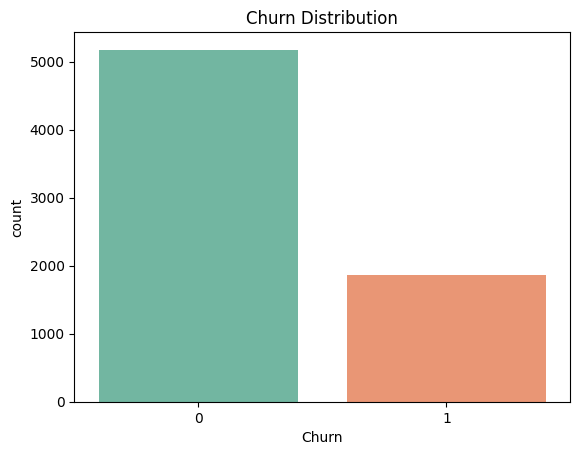

In [44]:
sns.countplot(x=df["Churn"], palette="Set2")
plt.title("Churn Distribution")
plt.show()

###Data Cleaning and Preprocessing

Dropping Customer ID as it’s not useful for modeling

In [17]:
df.drop(columns=['customerID'], inplace=True)

Converting 'TotalCharges' to numeric (to fix issues with missing or incorrect values)

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Filling missing values in TotalCharges

In [19]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-19-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Converting categorical columns using Label Encoding

In [20]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Encoding the categorical variable

In [21]:
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Normalizing the numerical features

In [22]:
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

###Model Development

Splitting the data into features and target

In [23]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Train-test splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Initializing model

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Prediction

In [27]:
y_pred = model.predict(X_test)

Evaluating

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7934705464868701
Precision: 0.6387959866220736
Recall: 0.5106951871657754
F1 Score: 0.5676077265973254


Confusion Matrix

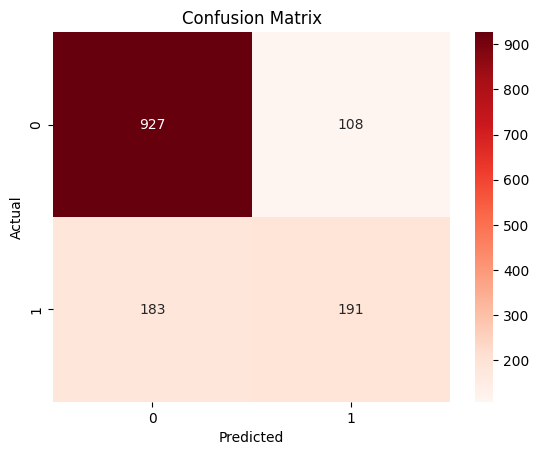

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Finding Important features

In [31]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features Influencing Churn:")
print(feature_importance.head(10))

Top Features Influencing Churn:
TotalCharges       0.186841
MonthlyCharges     0.179192
tenure             0.154338
Contract           0.079631
PaymentMethod      0.050095
OnlineSecurity     0.049580
TechSupport        0.043603
gender             0.027892
InternetService    0.027789
OnlineBackup       0.027075
dtype: float64


Plotting features

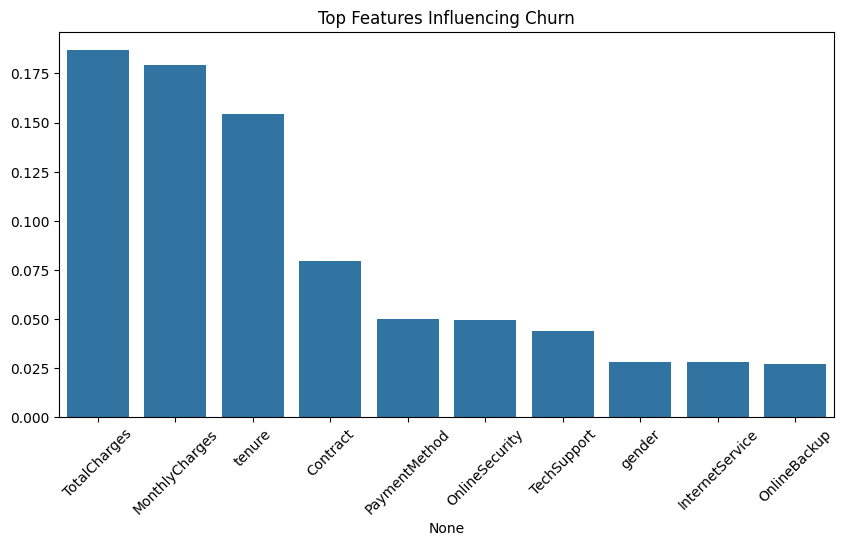

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance[:10].index, y=feature_importance[:10].values)
plt.xticks(rotation=45)
plt.title("Top Features Influencing Churn")
plt.show()

###Comparing various models

Defining

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

Training and evaluation

In [34]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results

In [36]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.800568   0.646688  0.548128  0.593343
Random Forest        0.793471   0.638796  0.510695  0.567608
XGBoost              0.779986   0.598765  0.518717  0.555874
LightGBM             0.802697   0.656863  0.537433  0.591176


Plot

<Figure size 1000x500 with 0 Axes>

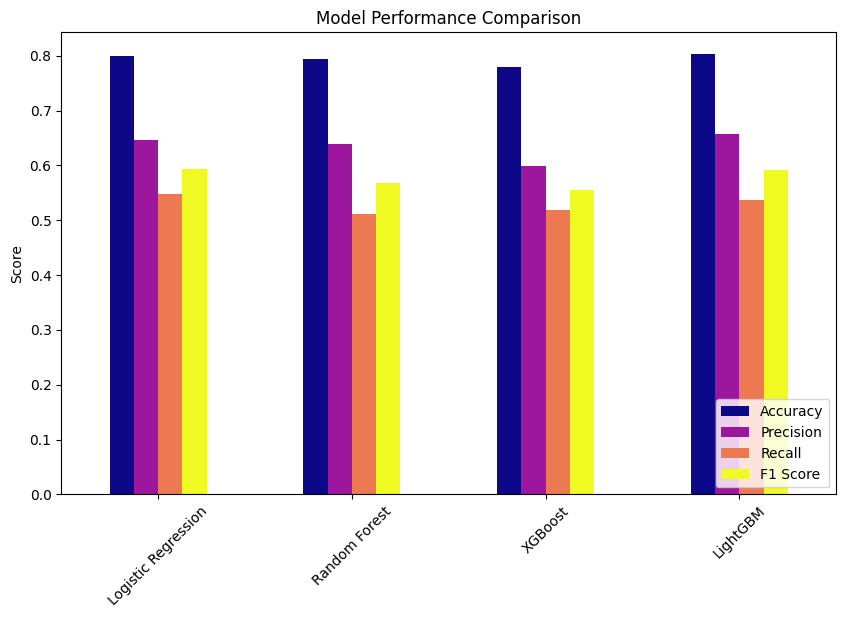

In [42]:
plt.figure(figsize=(10, 5))
results_df.plot(kind="bar", figsize=(10, 6), colormap="plasma")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.show()